# Melbourne Housing Snapshot

Dicionário de Variáveis:

Rooms: Número de cômodos

Price: Preço em dólares

Method: Método de venda

Type: Tipo de propriedade

SellerG: Agente imobiliário

Date: Data de venda

Distance: Distância do CBD (Central Business District)

Regionname: Região geral

Propertycount: Contagem de propriedades na vizinhança

Bedroom2: Número de quartos

Bathroom: Número de banheiros

Car: Número de vagas de estacionamento

Landsize: Tamanho do terreno

BuildingArea: Área construída

CouncilArea: Conselho governante da área



# Bibliotecas Utilizadas:

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from folium.plugins import MarkerCluster
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor



# Leitura do conjunto de dados de Melbourne Housing Snapshot:

In [51]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Identificando o tipo de cada coluna:


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Substituir NaN por zero:

In [53]:
df.fillna(0, inplace=True)

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,0.0,0.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,0.0,1981.0,0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,0.0,1997.0,0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,0,-37.85908,144.89299,Western Metropolitan,6380.0


# Correlação entre as variaveis númericas:

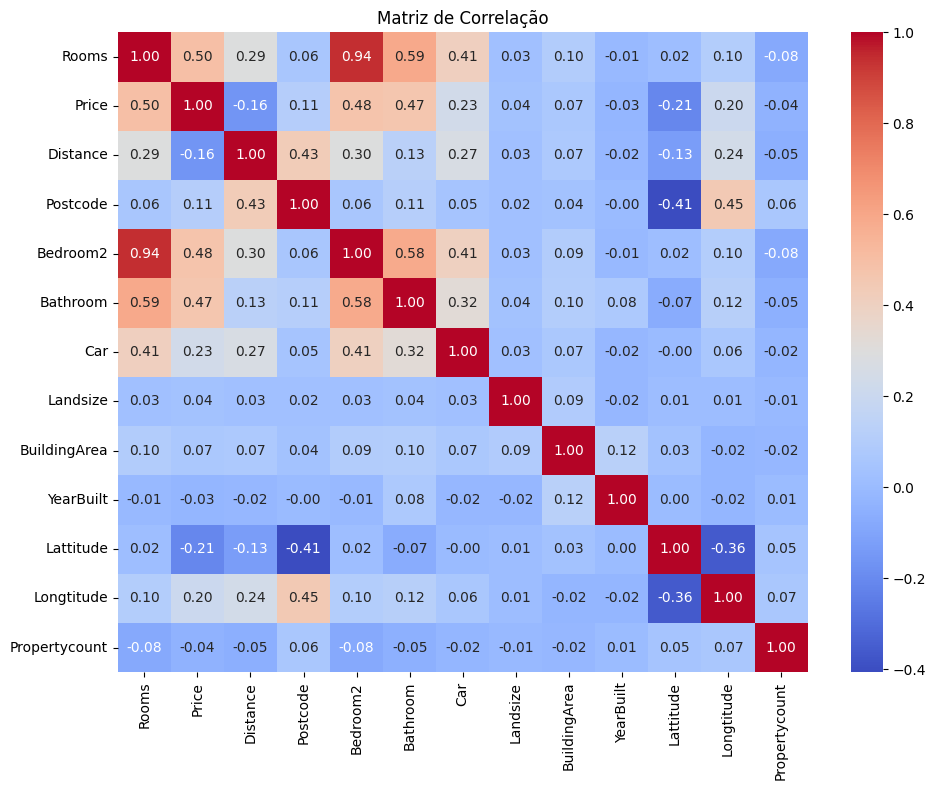

In [54]:
# Selecionando apenas as colunas numéricas do DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# Selecionando as colunas com maior correlação com preço:

In [55]:
# Criando um novo DataFrame com as variáveis relevantes, incluindo 'Car'
df_relevant = df[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Price']]

# Exibindo as primeiras linhas do novo DataFrame
print(df_relevant.head())


   Rooms  Bedroom2  Bathroom  Car      Price
0      2       2.0       1.0  1.0  1480000.0
1      2       2.0       1.0  0.0  1035000.0
2      3       3.0       2.0  0.0  1465000.0
3      3       3.0       2.0  1.0   850000.0
4      4       3.0       1.0  2.0  1600000.0


# Modelo de Machine Learning para previsão do preço:

Separar a variavel que queremos prever do restante das variaveis:

In [56]:
Y = df_relevant.Price

X = df_relevant.drop('Price', axis = 1)

Dividir os dados em conjuntos de treinamento e teste e exibe o número de amostras em cada conjunto:


In [57]:
# Dividindo os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Exibindo o número de amostras nos conjuntos de treinamento e teste
print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])


Número de amostras no conjunto de treinamento: 10864
Número de amostras no conjunto de teste: 2716


### Modelo de Regressão Linear com colunas selecionadas:

Erro médio quadrático (MSE): 275266061504.07965
Coeficiente de determinação (R²): 0.30700790343175055


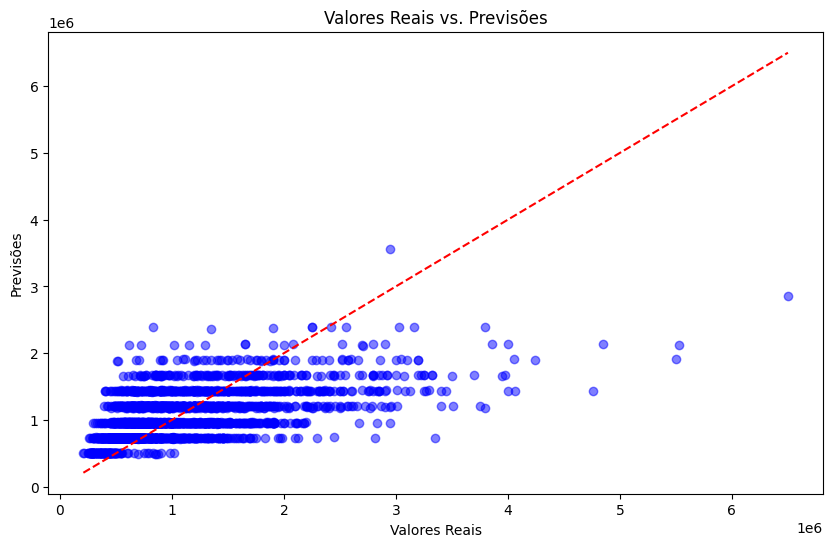

In [75]:
# Criando uma instância do modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred = model.predict(X_test)

# Avaliando o modelo usando a métrica de erro médio quadrático (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Erro médio quadrático (MSE):", mse)

# Avaliando o modelo usando o coeficiente de determinação (R²)
r2 = r2_score(Y_test, Y_pred)
print("Coeficiente de determinação (R²):", r2)

# Plotando os valores reais vs. previsões
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title('Valores Reais vs. Previsões')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

### Modelo de Regressão Linear com todas variaveis numéricas do df, sem selecionar:

Erro médio quadrático (MSE) para regressão linear: 195661084094.76166
Coeficiente de determinação (R²) para regressão linear: 0.5074162643125699


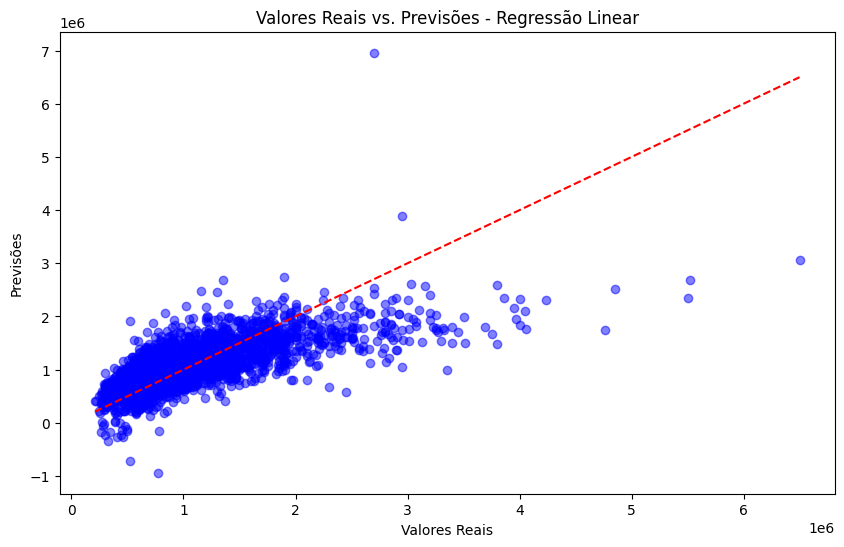

In [76]:
# Selecionando todas as variáveis numéricas, exceto 'Price'
numeric_cols = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Separando as variáveis independentes (X) e a variável dependente (Y)
X_linear = df[numeric_cols]
Y_linear = df['Price']

# Dividindo os dados em conjuntos de treinamento e teste
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(X_linear, Y_linear, test_size=0.2, random_state=42)

# Criando uma instância do modelo de regressão linear
model_linear = LinearRegression()

# Treinando o modelo com os dados de treinamento
model_linear.fit(X_train_linear, Y_train_linear)

# Fazendo previsões nos dados de teste
Y_pred_linear = model_linear.predict(X_test_linear)

# Avaliando o modelo usando a métrica de erro médio quadrático (MSE)
mse_linear_result = mse_linear(Y_test_linear, Y_pred_linear)
print("Erro médio quadrático (MSE) para regressão linear:", mse_linear_result)

# Avaliando o modelo usando o coeficiente de determinação (R²)
r2_linear_result = r2_linear(Y_test_linear, Y_pred_linear)
print("Coeficiente de determinação (R²) para regressão linear:", r2_linear_result)

# Plotando os valores reais vs. previsões para regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_linear, Y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(Y_test_linear), max(Y_test_linear)], [min(Y_test_linear), max(Y_test_linear)], color='red', linestyle='--')
plt.title('Valores Reais vs. Previsões - Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()


### Modelo de Regressão de Árvore de decisão:

Erro médio quadrático (MSE) para árvore de decisão: 161964703197.8686
Coeficiente de determinação (R²) para árvore de decisão: 0.592248101252098


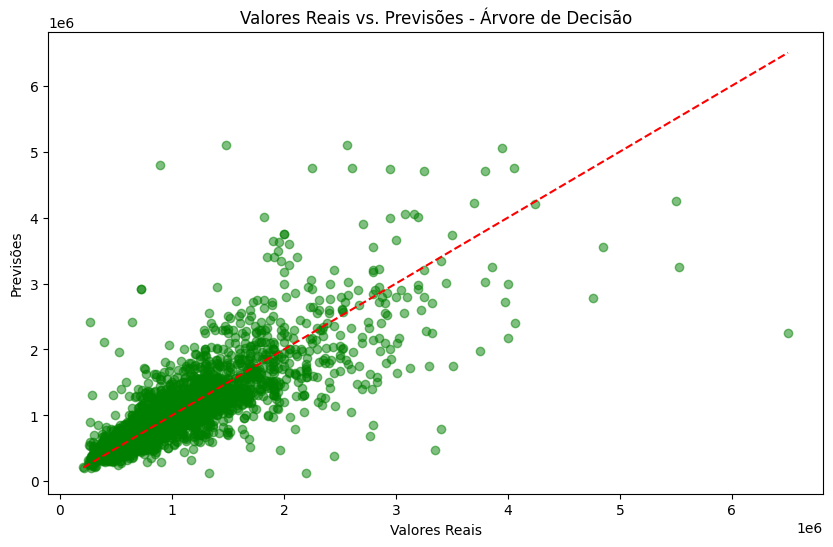

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse_tree, r2_score as r2_tree

# Criando uma instância do modelo de árvore de decisão
model_tree = DecisionTreeRegressor(random_state=42)

# Treinando o modelo com os dados de treinamento
model_tree.fit(X_train_linear, Y_train_linear)

# Fazendo previsões nos dados de teste
Y_pred_tree = model_tree.predict(X_test_linear)

# Avaliando o modelo usando a métrica de erro médio quadrático (MSE)
mse_tree_result = mse_tree(Y_test_linear, Y_pred_tree)
print("Erro médio quadrático (MSE) para árvore de decisão:", mse_tree_result)

# Avaliando o modelo usando o coeficiente de determinação (R²)
r2_tree_result = r2_tree(Y_test_linear, Y_pred_tree)
print("Coeficiente de determinação (R²) para árvore de decisão:", r2_tree_result)

# Plotando os valores reais vs. previsões para árvore de decisão
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_linear, Y_pred_tree, color='green', alpha=0.5)
plt.plot([min(Y_test_linear), max(Y_test_linear)], [min(Y_test_linear), max(Y_test_linear)], color='red', linestyle='--')
plt.title('Valores Reais vs. Previsões - Árvore de Decisão')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()


# Comparação direta entre os Modelos:

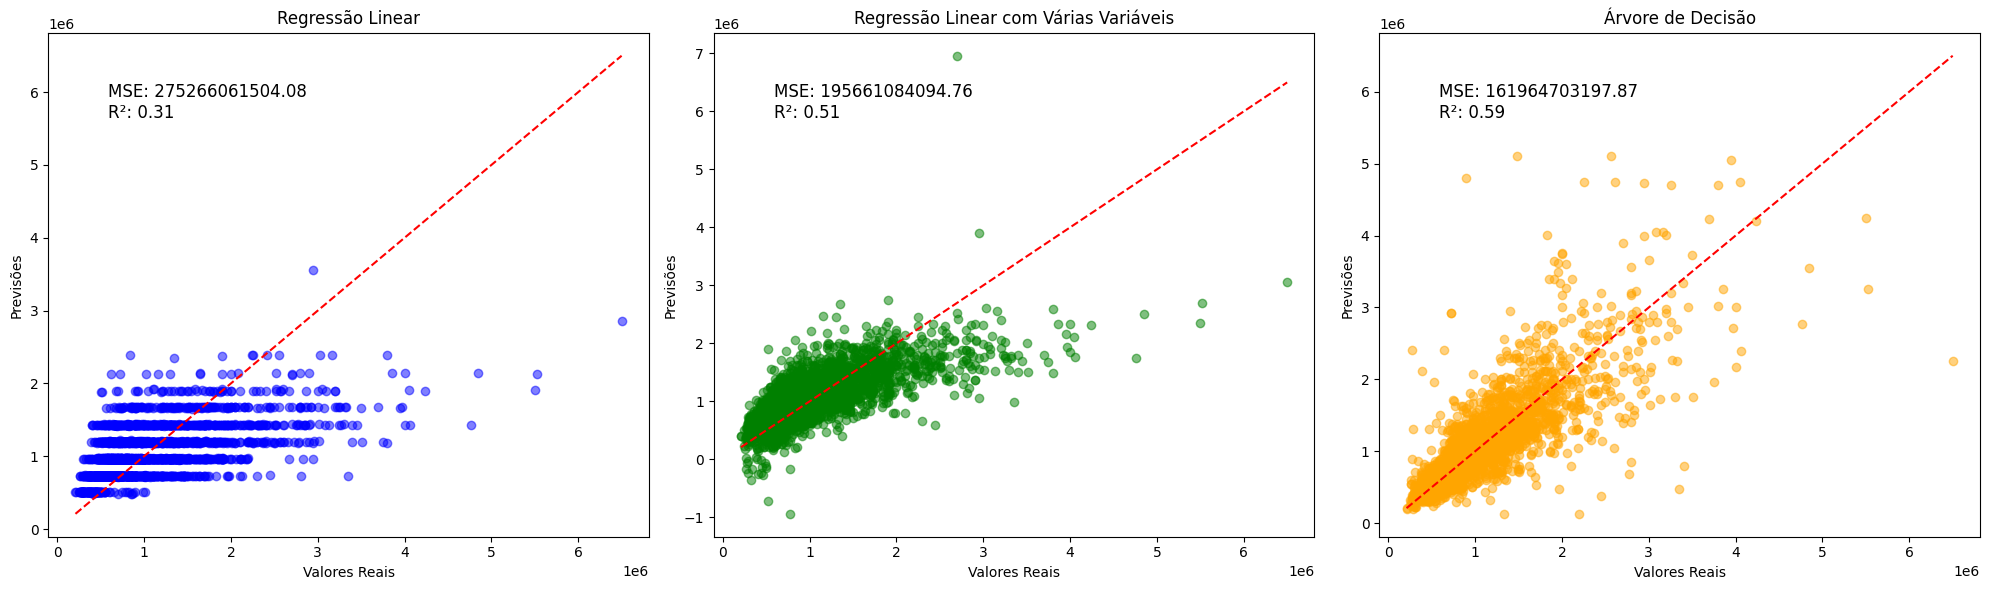

In [105]:
# Plotando os valores reais vs. previsões para regressão linear
plt.figure(figsize=(20, 6))

# Plotando para regressão linear
plt.subplot(1, 3, 1)
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.text(0.1, 0.9, 'MSE: {:.2f}\nR²: {:.2f}'.format(mse, r2), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title('Regressão Linear')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')

# Plotando para regressão linear com várias variáveis
plt.subplot(1, 3, 2)
plt.scatter(Y_test_linear, Y_pred_linear, color='green', alpha=0.5)
plt.plot([min(Y_test_linear), max(Y_test_linear)], [min(Y_test_linear), max(Y_test_linear)], color='red', linestyle='--')
plt.text(0.1, 0.9, 'MSE: {:.2f}\nR²: {:.2f}'.format(mse_linear_result, r2_linear_result), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title('Regressão Linear com Várias Variáveis')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')

# Plotando para árvore de decisão
plt.subplot(1, 3, 3)
plt.scatter(Y_test_linear, Y_pred_tree, color='orange', alpha=0.5)
plt.plot([min(Y_test_linear), max(Y_test_linear)], [min(Y_test_linear), max(Y_test_linear)], color='red', linestyle='--')
plt.text(0.1, 0.9, 'MSE: {:.2f}\nR²: {:.2f}'.format(mse_tree_result, r2_tree_result), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title('Árvore de Decisão')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')

plt.tight_layout()
plt.show()
